<h2>Desafio 2 - Machine Learning


<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marecelo Carrizo</li>
    
</ul>
    

<h4>Objetivo</h4>
Aplicar las ténicas de Machine Learning sobre el dataset de Properati para calcular automáticamente el precio por metro cuadrado de las propiedades. 

<a id="section_toc"></a> 
<h2> Tabla de Contenidos </h2>

[Librerías](#section_import)

[Dataset](#section_dataset)

[Selección de los datos](#section_selection)

[Limpieza de datos](#section_limpieza)

[Imputación de datos faltantes](#section_imput)

$\hspace{.5cm}$[Imputamos datos de <strong>surface</strong>](#section_surface)

$\hspace{.5cm}$[Imputamos datos de <strong>price_usd_per_m2</strong>](#section_price)

$\hspace{.5cm}$[Creación de datos para imputación de rooms](#section_categories)
       
[Extracción de datos de <strong>description</strong>](#section_description)   
    
$\hspace{.5cm}$[Cantidad de ambientes](#section_amb)

$\hspace{.5cm}$[Amenities](#section_caba_description_amenities)
    
[Creación de dummies sobre datos categóricos](#section_dummies)
    
[Mapa de correlación de datos cuantitativos](#section_corrheatmap)   
    
[Modelos de Regresión](#section_model)
    
$\hspace{.5cm}$[Primeras pruebas](#section_test1)  
    
$\hspace{.5cm}$[Pruebas con Lasso](#section_test_lasso1)  

[Definición de Outliers](#section_outliers)  

[Pruebas con datos ajustados](#section_test2)

$\hspace{.5cm}$[Pruebas Modelo Lasso](#section_test_lasso2)

$\hspace{.5cm}$[Pruebas con modelo Ridge](#section_test_ridge)

$\hspace{.5cm}$[Pruebas con modelo Elastic](#section_test_elastic)

[Creación de features para complejizar el modelo](#section_new_features)

$\hspace{.5cm}$[Superficie<sup>2</sup>](#section_sup2)

$\hspace{.5cm}$[Superficie<sup>3</sup>](#section_sup3)

[Estimación de precio total utilizando el mismo modelo](#section_total_price_estimate)

<a id="section_import"></a> 
<h3>Librerías</h3>

[volver a TOC](#section_toc)

In [1]:
import numpy as np
import pandas as pd
import re

# Librería Grafica.
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

#Opciones de visualización de columnas y filas al ejecutar las celdas
pd.set_option('display.max_columns', 100) # Para mostrar todas las columnas
pd.set_option('display.max_rows', 100) # Para mostrar todas las filas

<a id="section_dataset"></a> 
<h3>Dataset</h3>

[volver a TOC](#section_toc)

In [2]:
# Definimos la ruta de la información.
data_propiedades = "Data/properati.csv"

# Leemos los datos del archivo
data = pd.read_csv(data_propiedades, sep=",", encoding="UTF-8")

# Chequeamos que los datos se hayan importado correctamente
data.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
60392,60392,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,3435874.0,"-34.6180489,-58.4604161",-34.618049,-58.460416,89700.0,USD,1582711.65,89700.00,48.0,43.0,1868.750000,2086.046512,NaN,NaN,NaN,http://www.properati.com.ar/19z6q_venta_depart...,Excelente edificio ubicado a cuadras de Plaza ...,Excelente mono-ambiente en la zona del barrio ...,https://thumbs4.properati.com/1/ZzxQFfRop8Perx...
28186,28186,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9457877,-60.6637305",-32.945788,-60.663731,1240000.0,ARS,1227064.69,69543.75,69.0,34.0,1007.880435,36470.588235,NaN,1.0,NaN,http://www.properati.com.ar/17vjo_venta_depart...,"Departamento en construcción, entrega estimada...",DEPARTAMENTO UN DORMITORIO CON TERRAZA EXCLUSI...,https://thumbs4.properati.com/1/64a3JJGKZ9Bbob...
43589,43589,sell,house,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6435972,-58.5232178",-34.643597,-58.523218,165000.0,USD,2911342.50,165000.00,135.0,120.0,1222.222222,1375.000000,NaN,NaN,NaN,http://www.properati.com.ar/18yqn_venta_casa_l...,Casa en lote propio ex municipal barrio mil ca...,Venta casa 3 ambientes,https://thumbs4.properati.com/1/c0GHluM83Sng-g...
33528,33528,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0052186,-57.560066",-38.005219,-57.560066,3000000.0,ARS,2968705.29,168251.03,110.0,110.0,1529.554818,27272.727273,NaN,3.0,NaN,http://www.properati.com.ar/189jr_venta_depart...,Estructura de hormigón armado con cerramient...,3 amb. en pozo Macrocentro,https://thumbs4.properati.com/2/asAqQye5k8tJOI...
39302,39302,sell,house,Paso del Rey,|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|Pas...,Argentina,Bs.As. G.B.A. Zona Oeste,3430102.0,"-34.6562873,-58.7614576",-34.656287,-58.761458,180000.0,USD,3176010.00,180000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/18nae_venta_casa_p...,CODIGO: 487-3091 ubicado en: Padre Luis Varvel...,Hermosa Casa a estrenar en Paso del Rey Norte,https://thumbs4.properati.com/2/UxY6H2vjUYPDaR...


In [3]:
# Chequeamos cantidad de registros y cantidad de columnas
data.shape

(121220, 26)

<a id="section_selection"></a> 
<h3>Selección de los datos</h3>

[volver a TOC](#section_toc)

En base a los análisis previos realizados sobre el Dataset, tomaremos los datos de CABA únicamente para realizar un modelo de machine learning. 

In [4]:
# Creamos una máscara y la aplicamos al dataframe anterior para traer los registros que necesitamos
data_caba_mask = data.state_name == 'Capital Federal' 
data_caba = data.loc[data_caba_mask, :]

# Chequeamos cómo quedaron los datos
data_caba.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...


In [5]:
data_caba.shape

(32316, 26)

In [6]:
data_caba.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

<a id="section_dataset_nulos"></a> 
<h4>Cálculo de cantidad de nulos</h4>

[volver a TOC](#section_toc)

In [7]:
# # Calculamos cantidad de nulos por campo
# data_caba.isnull().sum()

In [8]:
# # Calculamos porcentaje de nulos por campo
#  print(np.round((100 * cant_nulos_por_campo / data_caba.shape[0]),2))

<h4> Distribución de <strong>property_type</strong>

In [9]:
# Contamos cantidad de valores de cada elemento en property_type y operation para ver distribución
property_type_count = data_caba.property_type.value_counts()
print(f'property_type: \n{property_type_count}')

property_type: 
apartment    27037
house         2087
PH            1828
store         1364
Name: property_type, dtype: int64


In [10]:
# # Convertimos el count anterior en las categorías del gráfico
# categories = np.array(property_type_count.index)

# cord_x = data_caba.property_type.value_counts() / data_caba.shape[0]
# palette = ['#440154', '#29788E', '#22A784', '#FDE724']

# p = figure(x_range=categories, plot_width=500, plot_height=200)
# p.vbar(x=categories, top=cord_x, width=0.6,
#        color=palette)

# p.yaxis.formatter = NumeralTickFormatter(format='0 %')
# output_notebook(resources=INLINE)
# show(p)

<h4>Distribución de <strong>currency</strong></h4>

In [11]:
data_caba.currency.value_counts()

USD    27826
ARS     1190
PEN        2
Name: currency, dtype: int64

<h4>Distribución de <strong>barrio</strong></h4>

In [12]:
place_name_count = data_caba.place_name.value_counts()
# place_name_count.sort_index()
# place_name_count

<a id="section_limpieza"></a> 
<h3>Limpieza de datos</h3>

[volver a TOC](#section_toc)

<a id="section_dataset_drop"></a> 
<h4> Drop de columnas innecesarias </h4>

[volver a TOC](#section_toc)

Eliminamos las columnas que en esta instancia no aportan datos útiles para el modelo predictivo que queremos crear. 
 

In [13]:
# Creamos la lista de columnas a filtrar
drop_columns = ['Unnamed: 0', 'operation', 'place_with_parent_names', 'country_name', 'state_name', 'geonames_id', 'lat-lon','lat', 'lon', 
                'floor', 'expenses','properati_url','title', 'image_thumbnail']

data_caba_clean = data_caba.drop(drop_columns, axis=1)
# data_caba_clean.head(5)


<h3> Limpiamos <strong>currency</strong> </h3>

[volver a TOC](#section_toc)

In [14]:
# Creamos una mask para traer los valores en monedas que no son USD ni ARS.
currency_OTHER_CURRENCY_mask = (data_caba_clean.currency == 'PEN') | (data_caba_clean.currency == 'UYU')
# Observamos esos registros
data_caba_clean.loc[currency_OTHER_CURRENCY_mask, :]

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description
50387,apartment,Capital Federal,380000.0,PEN,2066864.90,117139.33,NaN,NaN,NaN,NaN,NaN,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...
50388,apartment,Capital Federal,950000.0,PEN,5167162.35,292848.33,NaN,NaN,NaN,NaN,NaN,Ref.: 56Duplex en venta de 1 dormitorio con ap...


In [15]:
# Hacemos drop de esos registros y chequeamos la diferencia entre cantidad original y actual
cant_registros = data_caba_clean.shape[0]
# Dropeamos las moneda PEN y UYU ## OJO la moneda UYU era de una propiedad en Mendoza.
data_caba_clean.drop(data_caba_clean.loc[currency_OTHER_CURRENCY_mask, :].index, inplace = True) 
# Verificamos.
print(f'Cantidad de registros original - registro actuales: {cant_registros - data_caba_clean.shape[0]}')

Cantidad de registros original - registro actuales: 2


<h3> Limpiamos <strong>place_name</strong> </h3>

[volver a TOC](#section_toc)

In [16]:
# Creamos una mascara y dropeamos los de 'Capital Federal'
capi_mask = data_caba_clean.place_name == 'Capital Federal'
data_caba_clean.drop(data_caba_clean.loc[capi_mask, :].index, inplace=True)

# Chequeamos cómo quedaron los datos
data_caba_clean.shape

(31019, 12)

<h3> Volvemos a calcular cantidad de nulos luego de eliminar columnas y registros sin barrio específico

In [17]:
# Calculamos cantidad de nulos por campo
data_caba_clean.isnull().sum()

property_type                     0
place_name                        0
price                          2959
currency                       2959
price_aprox_local_currency     2959
price_aprox_usd                2959
surface_total_in_m2            5707
surface_covered_in_m2          1963
price_usd_per_m2               8416
price_per_m2                   4570
rooms                         15748
description                       0
dtype: int64

In [18]:
# Calculamos porcentaje de nulos por campo
print(np.round((100 * data_caba_clean.isnull().sum() / data_caba_clean.shape[0]),2))

property_type                  0.00
place_name                     0.00
price                          9.54
currency                       9.54
price_aprox_local_currency     9.54
price_aprox_usd                9.54
surface_total_in_m2           18.40
surface_covered_in_m2          6.33
price_usd_per_m2              27.13
price_per_m2                  14.73
rooms                         50.77
description                    0.00
dtype: float64


In [19]:
# data_caba_clean.sample(5)

<h3> Eliminamos registros según un umbral de datos faltantes </h3>

[volver a TOC](#section_toc)

In [20]:
data_caba_clean.shape

(31019, 12)

In [21]:
# Eliminamos los registros donde no haya por lo menos 10 campos completos. 

umbral = 10
data_caba_clean.dropna(axis = 0, thresh=umbral, inplace=True)

display(data_caba_clean.shape)
# Se pierden 3500 datos aprox (ver shape de abajo)

(25570, 12)

In [22]:
#Vemos cómo quedaron los datos de precio que nos importan
mask_price_validation = data_caba_clean.price != data_caba_clean.price_aprox_usd
display(data_caba_clean.loc[mask_price_validation, :].shape)


# display(data_caba_clean.loc[mask_price_validation, :].head(30))
# data_caba_clean.sample(5)

(1131, 12)

In [23]:
data_caba_clean.shape

(25570, 12)

In [24]:
data_caba_clean.isnull().sum()

property_type                     0
place_name                        0
price                             0
currency                          0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2            3868
surface_covered_in_m2           156
price_usd_per_m2               3868
price_per_m2                    158
rooms                         11173
description                       0
dtype: int64

<a id="section_imput"></a> 
<h3>Imputación de datos faltantes</h3>

[volver a TOC](#section_toc)

Primero realizamos ciertas verificaciones de los datos

In [25]:
# 1. Verificamos que el price y el price_aprox_usd sean los mismos, y luego si fuera así dropeamos uno de los dos y utilizamos el otro como target

mask_price_validation = data_caba_clean.price != data_caba_clean.price_aprox_usd

display(data_caba_clean.loc[mask_price_validation, :].shape)

# Detectamos que hay 1131 propiedades donde los valores son diferentes? pero estan en Pesos o son NaN?

display(data_caba_clean.loc[mask_price_validation, :].sample(10))

# Detectamos que tenemos los dos casos, donde los precios son NaN y donde la moneda está en ARS (lo cual no estaría mal)
# En el caso de ARS, vemos que el valor de price toma el de la moneda local ~ Por lo que podriamos llegar a eliminar price, currency y price_aprox_local_currency 

# Para los valores de NaN tendriamos que tomar la decisión si los dropeamos o tratamos de calcular un precio promedio en base a la cantidad de metros cuadrados.

(1131, 12)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description
85233,apartment,San Telmo,1687942.0,ARS,1670334.06,94665.99,43.0,43.0,2201.534651,39254.465116,NaN,EXCELENTE AMBIENTE A ESTRENAR!! UBICADO EN BAR...
74633,store,Nuñez,3932100.0,ARS,3891081.94,220526.62,153.0,153.0,1441.350458,25700.000000,NaN,Excelente Local de 153m2. En PB 95m2 y subsuel...
42262,apartment,Almagro,1640000.0,ARS,1622892.23,91977.23,34.0,32.0,2705.212647,51250.000000,1.0,Excelente monoambiente divisible ubicado en el...
117738,apartment,Balvanera,1630000.0,ARS,1612996.49,91416.39,30.0,24.0,3047.213000,67916.666667,NaN,Monoambiente ubicado en el área de máxima conc...
86674,apartment,Boca,2287973.0,ARS,2264105.71,128317.93,64.0,60.0,2004.967656,38132.883333,NaN,Di Mitrio InmobiliariaAv. Martin Garcia 560 - ...
85826,apartment,San Telmo,1561754.0,ARS,1545462.34,87588.90,24.0,24.0,3649.537500,65073.083333,NaN,ASTILLERO se encontrará emplazado en Madero Su...
120376,apartment,San Telmo,1419600.0,ARS,1404791.21,79616.38,34.0,31.0,2341.658235,45793.548387,NaN,"Departamento 34m², Capital Federal, San Telmo,..."
42260,apartment,Almagro,1582000.0,ARS,1565497.14,88724.37,34.0,32.0,2609.540294,49437.500000,1.0,Excelente monoambiente divisible ubicado en el...
80674,apartment,Parque Patricios,901300.0,ARS,891897.89,50548.21,32.0,28.0,1579.631562,32189.285714,NaN,SE VENDE MONOAMBIENTE EN POZO!-Superficie Tota...
85911,apartment,San Telmo,2354071.0,ARS,2329514.23,132024.95,41.0,36.0,3220.120732,65390.861111,NaN,ASTILLERO se encontrará emplazado en Madero Su...


<a id="section_surface"></a> 
<h3> Completamos datos faltantes de superficie </h3>

[volver a TOC](#section_toc)

In [26]:
# Para la superficie de metros cuadadros totales, podemos creer que en caso de ser Nan 
# es porque es un departamente sin balcon y la cantidad de m2 cubierta sería iguala la cantidad de m2 totales.data_caba

data_caba_clean.surface_total_in_m2.fillna(data_caba_clean.surface_covered_in_m2 + (data_caba_clean.surface_covered_in_m2 * 0.10), inplace=True)

# data_caba_clean.sample(5)

In [27]:
# Idem al punto anterior pero ahora de surface_total a surface_covered

data_caba_clean.surface_covered_in_m2.fillna(data_caba_clean.surface_total_in_m2, inplace=True)

# data_caba_clean.sample(5)

<a id="section_price"></a> 
<h3> Completamos datos faltantes de price_usd_per_m2 </h3>

[volver a TOC](#section_toc)

In [28]:
# Idem al punto anterior pero ahora calculamos el precio por metro cuadrado.

data_caba_clean.price_usd_per_m2.fillna(data_caba_clean.price_aprox_usd / data_caba_clean.surface_total_in_m2, inplace=True)

data_caba_clean.sample(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description
26406,apartment,San Cristobal,567000.0,USD,10004431.50,567000.0,38.0,38.0,14921.052632,14921.052632,2.0,Anticipo financiado en 10 cuotitasy CUOTITAS ...
93132,apartment,Villa Crespo,226087.0,USD,3989192.07,226087.0,86.0,69.0,2628.918605,3276.623188,NaN,Este emprendimiento está ubicado en pleno barr...
48165,apartment,Colegiales,240000.0,USD,4234680.00,240000.0,109.0,81.0,2201.834862,2962.962963,4.0,"Excelente Triplex, en edificio ""Premio Municip..."
62768,apartment,Palermo,95000.0,USD,1676227.50,95000.0,41.8,38.0,2272.727273,2500.000000,2.0,Corredor Responsable: Ariel Champanier - C.U.C...
92892,apartment,Villa Crespo,151524.0,USD,2673565.21,151524.0,59.0,47.0,2568.203390,3223.914894,NaN,Este emprendimiento está ubicado en pleno barr...


<h3> Eliminamos columnas de precios en moneda local </h3>

[volver a TOC](#section_toc)

In [29]:
# Dropeamos los valores que sabemos que está repetidos o con otra moneda.data_caba

data_caba_clean.drop(columns=['price', 'currency','price_per_m2', 'price_aprox_local_currency'], inplace=True)

data_caba_clean.sample(10)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description
39792,apartment,Belgrano,235000.00,81.0,81.0,2901.234568,NaN,DEPARTAMENTO EN VENTA | BELGRANO R - Capita...
60392,apartment,Caballito,89700.00,48.0,43.0,1868.750000,NaN,Excelente edificio ubicado a cuadras de Plaza ...
85186,apartment,Boca,98000.00,44.0,44.0,2227.272727,NaN,Sobre la calle Olavarria donde transcurre la v...
23378,apartment,Caballito,113905.94,52.8,48.0,2157.309470,2.0,Corredor Responsable: Hernan Perrone - C.U.C.I...
87647,store,Once,3000000.00,2750.0,2750.0,1090.909091,NaN,"Ubicacion: Avenida Rivadavia N° 2866, entre Av..."
26892,apartment,Almagro,69000.00,34.0,34.0,2029.411765,2.0,Venta 2 Amb en la calle Moreno 3.400 Almagro. ...
57119,apartment,Saavedra,119000.00,65.0,54.0,1830.769231,2.0,Oportunidad oficinas con buen acceso desde Pan...
114008,house,Villa Pueyrredón,450000.00,244.0,160.0,1844.262295,NaN,"Excelente propiedad en importante complejo, a ..."
38955,apartment,Barrio Norte,145000.00,63.0,36.0,2301.587302,2.0,Primer piso con patio2 ambientes luminososBañ...
37901,apartment,Belgrano,249000.00,119.0,41.0,2092.436975,3.0,GRAN UNIDAD LLENA DE LUZ Y SOL - A ESTRENAREDI...


<h3> Nuevo recuento de nulos </h3>

In [30]:
print('\nPorcentaje de valores incompletos por columna:')
print(f'{round(100 * data_caba_clean.isnull().sum()/data_caba_clean.shape[0], 2)}')

display(data_caba_clean.shape)


Porcentaje de valores incompletos por columna:
property_type             0.0
place_name                0.0
price_aprox_usd           0.0
surface_total_in_m2       0.0
surface_covered_in_m2     0.0
price_usd_per_m2          0.0
rooms                    43.7
description               0.0
dtype: float64


(25570, 8)

<a id="section_categories"></a> 
<h3>Creación de datos para imputación de <strong>rooms<strong/></h3>

[volver a TOC](#section_toc)

In [31]:
# Delimitamos los bins para realizar un cut
# bins = [20, 30, 45, 75, 150, 220]
bins = [0, 30, 45, 75, 150, 220, 500]
labels = ['mono', 's45', 's75', 's150', 's220', 's500' ]

data_caba_clean['m2_categories'] = pd.cut(data_caba_clean.surface_covered_in_m2, bins, labels)
data_caba_clean['m2_labels'] = pd.cut(x=data_caba_clean.surface_covered_in_m2, bins=bins, labels=labels, right=False)


In [32]:
data_caba_clean.m2_categories.value_counts().sort_index()

(0, 30]       2524
(30, 45]      7432
(45, 75]      7214
(75, 150]     5436
(150, 220]    1569
(220, 500]    1222
Name: m2_categories, dtype: int64

In [33]:
data_caba_clean.m2_labels.value_counts().sort_index()

mono    1627
s45     7846
s75     7462
s150    5558
s220    1625
s500    1262
Name: m2_labels, dtype: int64

<a id="section_description"></a> 
<h3> Extracción de datos del campo <strong>description</strong></h3>

[volver a TOC](#section_toc)

Normalización del campo para que sea todo minúscula.

In [34]:
#pasamos todos los string de la columna a minúscula para que las expresiones regulares no necesiten contener las dos formas
data_caba_clean.description = data_caba_clean.description.str.lower()

data_caba_clean.description.sample(10)

30220     muy luminoso con vista abierta y hermosos piso...
1091      casa totalmente a refaccionar (sobre lote de 8...
5225      excelente departamento de 4 ambientes al frent...
87000     2 ambientes departamento en construccion a poc...
37448     corredor responsable: uno bienes raices srl - ...
34708     corredor responsable: ariel champanier - c.u.c...
7261      libertad 1500. en  distinguido edificio imperi...
116423    venta - departamento - argentina, buenos aires...
38549     excelente ph en pedro goyena, no paga expensas...
82155     edificio boutique  con amplias visuales ubicad...
Name: description, dtype: object

<a id="section_amb"></a> 
<h4> Cantidad de ambientes</h4>

[volver a TOC](#section_toc)

In [35]:
#Creamos expresiones regulares y las buscamos en el campo descripción, luego asiganmos los valores encontrados a columnas nuevas

In [36]:
amb_pattern = "((?P<numero_amb>\d)(\s)?(amb|anv|amv|anb))"
amb_pattern_regex = re.compile(amb_pattern)

In [37]:
amb_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      amb_pattern_regex.search(x))
mask_amb_match_notnull = amb_match.notnull()

# Aplicamos el grupo que encuentra el dígito de cantidad de ambientes, casteado como integer
data_caba_clean.loc[mask_amb_match_notnull, 'number_rooms'] = \
amb_match.loc[mask_amb_match_notnull].apply(lambda x: int(x.group("numero_amb")))

In [38]:
dorm_pattern = "((?P<numero_dorm>\d)(\s)?(dorm))"
dorm_pattern_regex = re.compile(dorm_pattern)

In [39]:
dorm_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else dorm_pattern_regex.search(x))

mask_dorm_match_notnull = dorm_match.notnull()

data_caba_clean.loc[mask_dorm_match_notnull, 'number_rooms'] = \
dorm_match.loc[mask_dorm_match_notnull].apply(lambda x: int(x.group("numero_dorm"))+1)

#se asume que el numero de ambientes es numero_dorm +1

Tratamos de llenar los rooms que faltan con lo que obtuvimos de la descripción

In [40]:
# Cantidad de nulos que quedan en 'rooms'
data_caba_clean.rooms.isnull().sum()

11173

In [41]:
# Cantidad de datos que obtuvimos de la descripción
data_caba_clean.number_rooms.notnull().sum()

15721

In [42]:
data_caba_clean.rooms.fillna(data_caba_clean.number_rooms, inplace=True)

In [43]:
data_caba_clean.rooms.isnull().sum()

4633

Tratamos de llenar los rooms que faltan con los datos de las categorías creadas

In [44]:
#Creamos una serie donde el index son las categorias y los valores son la cantidad de ambientes estimados
room_index = ["mono", "s45", "s75", "s150", "s220", 's500']
room_values = [1,2,3,4,5,10]
rooms_series = pd.Series(room_values,index=room_index, dtype=int)
rooms_series.dtypes

dtype('int32')

In [51]:
mask_room_null = data_caba_clean.rooms.isnull()

0         False
2         False
7          True
8          True
13        False
          ...  
121153     True
121157     True
121158     True
121215    False
121217     True
Name: rooms, Length: 25570, dtype: bool

In [50]:
data_caba_clean.loc[mask_room_null, 'rooms'] = data_caba_clean.m2_labels.loc[mask_room_null].apply(rooms_series)



NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [52]:
data_caba_clean.rooms.value_counts()

2.0     5397
3.0     5250
1.0     4341
4.0     4012
5.0     1264
6.0      362
7.0      172
8.0       57
9.0       27
10.0      24
12.0      11
11.0       9
0.0        4
17.0       3
22.0       1
15.0       1
14.0       1
13.0       1
Name: rooms, dtype: int64

In [53]:
# data_caba_clean.rooms.fillna(data_caba_clean.rooms_upon_categories, inplace=True)
data_caba_clean.rooms.isnull().sum()

4633

In [54]:
# Vemos qué superficies tienen los registros donde room == null 
mask_room_null = data_caba_clean.rooms.isnull()
data_room_null = data_caba_clean.loc[mask_room_null, 'surface_covered_in_m2']

# plt.hist(data_room_null, bins=40, rwidth=0.8, color = '#29788E')
# plt.xlabel = 'Superficie cubierta'
# plt.ylabel = 'Count'
# plt.show()

data_room_null.value_counts()

32.0     181
40.0     155
30.0     150
34.0     146
35.0     143
        ... 
294.0      1
237.0      1
373.0      1
215.0      1
967.0      1
Name: surface_covered_in_m2, Length: 394, dtype: int64

In [55]:
#Eliminamos la columna que ya no vamos a utilizar
data_caba_clean.drop(columns=['number_rooms'], inplace=True)

In [56]:
data_caba_clean.isnull().sum()

property_type               0
place_name                  0
price_aprox_usd             0
surface_total_in_m2         0
surface_covered_in_m2       0
price_usd_per_m2            0
rooms                    4633
description                 0
m2_categories             173
m2_labels                 190
dtype: int64

In [57]:
#Eliminamos los registros que quedan ya que corresponden a data extrema
data_caba_clean.dropna(axis=0, inplace=True)

In [58]:
#Convertimos los datos de ambientes a numérico nuevamente para poder usarlo como variable
data_caba_clean.rooms = data_caba_clean.rooms.apply(pd.to_numeric)

In [59]:
data_caba_clean.dtypes

property_type              object
place_name                 object
price_aprox_usd           float64
surface_total_in_m2       float64
surface_covered_in_m2     float64
price_usd_per_m2          float64
rooms                     float64
description                object
m2_categories            category
m2_labels                category
dtype: object

<a id="section_caba_description_amenities"></a> 
<h4> Amenities</h4>

[volver a TOC](#section_toc)

<h5> Pileta </h5>

In [60]:
pileta_pattern = "(?P<pileta>pileta|piscina|picina|pisina|pool)"
pileta_pattern_regex = re.compile(pileta_pattern)

In [61]:
pileta_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      pileta_pattern_regex.search(x))
mask_pileta_match_notnull = pileta_match.notnull()

data_caba_clean.loc[mask_pileta_match_notnull, 'pool'] = 1

In [62]:
# data_caba_clean['pool']

In [63]:
data_caba_clean['pool'].notnull().sum()

5113

In [64]:
#Completamos los datos NaN con ceros (convertimos en una variable dummy)
data_caba_clean.pool.fillna(0, inplace = True)

<h5> Laundry </h5>

In [65]:
laudry_pattern = "(?P<laundry>laundry|lavadero)"
laundry_pattern_regex = re.compile(laudry_pattern)

laundry_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      laundry_pattern_regex.search(x))
mask_laundry_match_notnull = laundry_match.notnull()

data_caba_clean.loc[mask_laundry_match_notnull, 'laundry'] = 1

In [66]:
data_caba_clean['laundry'].notnull().sum()

9705

In [67]:
data_caba_clean.laundry.fillna(0, inplace = True)

<h5> Parking </h5>

In [68]:
parking_pattern = "(?P<parking>parking|estacionamiento|garage|cochera|garaje)"
parking_pattern_regex = re.compile(parking_pattern)

parking_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      parking_pattern_regex.search(x))
mask_parking_match_notnull = parking_match.notnull()

data_caba_clean.loc[mask_parking_match_notnull, 'parking'] = 1

In [69]:
data_caba_clean['parking'].notnull().sum()

8405

In [70]:
data_caba_clean.parking.fillna(0, inplace = True)

<h5> Gimnasio </h5>

In [71]:
gym_pattern = "(?P<gimnasio>gim|gym|fitness|fitnes|ejercicio)"
gym_pattern_regex = re.compile(gym_pattern)

gym_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      gym_pattern_regex.search(x))
mask_gim_match_notnull = gym_match.notnull()

data_caba_clean.loc[mask_gim_match_notnull, 'gym'] = 1

In [72]:
data_caba_clean['gym'].notnull().sum()

2871

In [73]:
data_caba_clean.gym.fillna(0, inplace = True)

<a id="section_dummies"></a> 
<h3> Creación dummies sobre datos categóricos </h3>

[volver a TOC](#section_toc)

In [74]:
# Usamos la función get_dummies con one-hot encoding (drop_first=True) para todas las variables que necesitamos
property_type_dummies = pd.get_dummies(data_caba_clean['property_type'], drop_first = True, prefix='prop_type')
property_type_dummies

,prop_type_apartment,prop_type_house,prop_type_store
0,0,0,0
2,1,0,0
13,1,0,0
14,1,0,0
16,0,0,0
...,...,...,...
121113,1,0,0
121120,1,0,0
121131,1,0,0
121138,1,0,0


In [75]:
m2_labels_dummies = pd.get_dummies(data_caba_clean['m2_labels'], drop_first = True, prefix='m2_label')

In [76]:
place_name_dummies = pd.get_dummies(data_caba_clean['place_name'], drop_first = True, prefix='place_name')

In [77]:
rooms_dummies = pd.get_dummies(data_caba_clean['rooms'], drop_first = True, prefix = 'rooms')

In [78]:
# Hacemos un join para concatenar las columnas al dataframe
data_caba_clean = data_caba_clean.join([property_type_dummies,m2_labels_dummies, place_name_dummies,rooms_dummies])

In [79]:
data_caba_clean.head(3)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,m2_categories,m2_labels,pool,laundry,parking,gym,prop_type_apartment,prop_type_house,prop_type_store,m2_label_s45,m2_label_s75,m2_label_s150,m2_label_s220,m2_label_s500,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boca,place_name_Boedo,place_name_Caballito,place_name_Catalinas,place_name_Centro / Microcentro,place_name_Chacarita,place_name_Coghlan,place_name_Colegiales,place_name_Congreso,place_name_Constitución,place_name_Flores,place_name_Floresta,place_name_Las Cañitas,place_name_Liniers,place_name_Mataderos,place_name_Monserrat,place_name_Monte Castro,place_name_Nuñez,place_name_Once,place_name_Palermo,place_name_Palermo Chico,place_name_Palermo Hollywood,place_name_Palermo Soho,place_name_Palermo Viejo,place_name_Parque Avellaneda,place_name_Parque Centenario,place_name_Parque Chacabuco,place_name_Parque Chas,place_name_Parque Patricios,place_name_Paternal,place_name_Pompeya,place_name_Puerto Madero,place_name_Recoleta,place_name_Retiro,place_name_Saavedra,place_name_San Cristobal,place_name_San Nicolás,place_name_San Telmo,place_name_Tribunales,place_name_Velez Sarsfield,place_name_Versalles,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa General Mitre,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,rooms_1.0,rooms_2.0,rooms_3.0,rooms_4.0,rooms_5.0,rooms_6.0,rooms_7.0,rooms_8.0,rooms_9.0,rooms_10.0,rooms_11.0,rooms_12.0,rooms_14.0,rooms_17.0,rooms_22.0
0,PH,Mataderos,62000.0,55.0,40.0,1127.272727,2.0,"2 ambientes tipo casa planta baja por pasillo,...","(30, 45]",s45,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,apartment,Mataderos,72000.0,55.0,55.0,1309.090909,2.0,2 ambientes 3er piso lateral living comedor am...,"(45, 75]",s75,0.0,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
13,apartment,Palermo Soho,111700.0,50.0,30.0,2234.000000,1.0,torre i mondrian. 3 ambientes con terraza y d...,"(0, 30]",s45,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
# Exportamos el archivo para usar en otras notebooks, esto lo guarda en el mismo directorio en el que estamos operando
# data_caba_clean.to_csv('data_caba_clean.csv')

<a id="section_corrheatmap"></a> 
<h3>Mapa de correlación de varaibles cuantitativas</h3>

[volver a TOC](#section_toc)

In [81]:
display(data_caba_clean.columns)

Index(['property_type', 'place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'description',
       'm2_categories', 'm2_labels', 'pool', 'laundry', 'parking', 'gym',
       'prop_type_apartment', 'prop_type_house', 'prop_type_store',
       'm2_label_s45', 'm2_label_s75', 'm2_label_s150', 'm2_label_s220',
       'm2_label_s500', 'place_name_Agronomía', 'place_name_Almagro',
       'place_name_Balvanera', 'place_name_Barracas',
       'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
       'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
       'place_name_Centro / Microcentro', 'place_name_Chacarita',
       'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
       'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
       'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
       'place_name_Monserrat', 'place_name_Monte Castr

In [82]:
data_caba_clean.shape

(20849, 97)

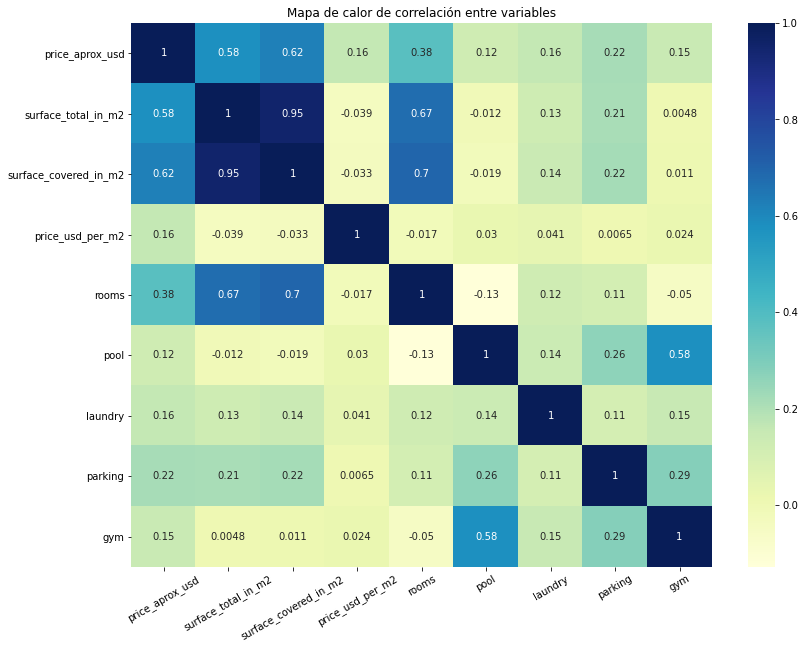

In [83]:
cols = ['price_aprox_usd', 'surface_total_in_m2','surface_covered_in_m2', 
        'price_usd_per_m2', 'rooms','pool', 'laundry', 'parking', 'gym']
#Mapa de correlación

g = plt.figure(figsize=(13,10))
g = sns.heatmap(data_caba_clean[cols].corr(),annot=True, cmap="YlGnBu")
g.set_xticklabels(data_caba_clean[cols].columns, rotation=30)
plt.title("Mapa de calor de correlación entre variables")
plt.show()


<a id="section_model"></a> 
<h3>Modelos de Regresión Lineal</h3>

[volver a TOC](#section_toc)

In [84]:
#Importamos las librerías de machine learning
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics, linear_model

In [85]:
# Funcion para realizar el entrenamiento con un set de testeo.

# Visualización de datos predichos para incluir en las funciones
def graf_lineal_model(X, y, y_pred):
    # Graficamos el modelo
    plt.scatter(y_pred, y, s=30, alpha=0.4, c='b')
    plt.plot(y,y, '-.',c='g')
    plt.show()
    print(y.shape)
    print(y_pred.shape)
    return

#Modelo de regresión lineal
def train_test_error(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
#   print (feature_cols)
#   print ("y_test sample: ",y_test.values[0:10])
#   print ("y_test sample: ",y_test)
#   print ("y_pred sample: ",y_pred[0:20].astype(int))
#   print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#   print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    graf_lineal_model(X, y_test, y_pred)
    return 

def train_test_error_lasso(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
    
#   cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    model = linear_model.LassoCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Imprime Alpha", model.alpha_)
    graf_lineal_model(X, y_train, y_pred)
    return 

def train_test_error_ridge(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
    
#   cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    #model = linear_model.Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
    model = linear_model.RidgeCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)#agr
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Coeficientes de la regresión", model.coef_)
    graf_lineal_model(X, y_train, y_pred)
    return 

def train_test_error_elastic(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
#     cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    model = linear_model.ElasticNetCV(l1_ratio = 1, max_iter=3000, normalize=True).fit(X_train, y_train)
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Coeficientes de la regresión", model.coef_)
    graf_lineal_model(X, y_train, y_pred)
    return 

<a id="section_variables"></a> 
<h3>Variables</h3>

[volver a TOC](#section_toc)

Armamos objetos con las listas de variables cualitativas para poder utilizarlas más económicamente

In [86]:
display(data_caba_clean.columns)

Index(['property_type', 'place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'rooms', 'description',
       'm2_categories', 'm2_labels', 'pool', 'laundry', 'parking', 'gym',
       'prop_type_apartment', 'prop_type_house', 'prop_type_store',
       'm2_label_s45', 'm2_label_s75', 'm2_label_s150', 'm2_label_s220',
       'm2_label_s500', 'place_name_Agronomía', 'place_name_Almagro',
       'place_name_Balvanera', 'place_name_Barracas',
       'place_name_Barrio Norte', 'place_name_Belgrano', 'place_name_Boca',
       'place_name_Boedo', 'place_name_Caballito', 'place_name_Catalinas',
       'place_name_Centro / Microcentro', 'place_name_Chacarita',
       'place_name_Coghlan', 'place_name_Colegiales', 'place_name_Congreso',
       'place_name_Constitución', 'place_name_Flores', 'place_name_Floresta',
       'place_name_Las Cañitas', 'place_name_Liniers', 'place_name_Mataderos',
       'place_name_Monserrat', 'place_name_Monte Castr

In [87]:
feature_cols_places = list(place_name_dummies.columns)
feature_cols_prop = list(property_type_dummies.columns)
feature_cols_labels = list(m2_labels_dummies.columns)
feature_cols_rooms = list(rooms_dummies.columns)
# feature_cols = ['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2',
#                'pool', 'laundry', 'parking', 'gym']

target = ['price_usd_per_m2']


<a id="section_test1"></a> 
<h3>Primeras pruebas de regresión simple y múltiple</h3>

[volver a TOC](#section_toc)

RMSE: 4636.487113298015
R2: 0.10247125157183412


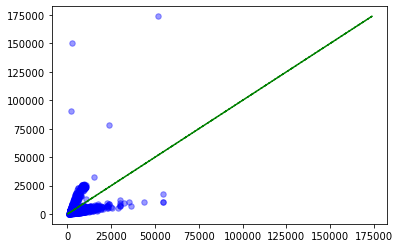

(5213,)
(5213,)


In [88]:
# Regresion lineal Simple
feature_cols = ['price_aprox_usd']
train_test_error(feature_cols, target)

RMSE: 4883.407246574795
R2: 0.004328351732439062


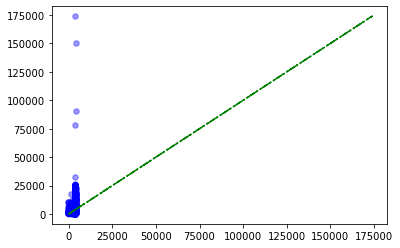

(5213,)
(5213,)


In [89]:
feature_cols = ['surface_covered_in_m2']
train_test_error(feature_cols, target)

RMSE: 4215.006161684359
R2: 0.2582344117745845


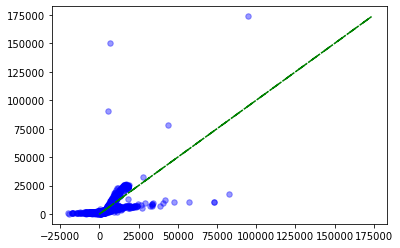

(5213,)
(5213,)


In [90]:
#Agregamos algunas variables cuantitativas y pobamos distintas combinaciones
feature_cols = ['price_aprox_usd', 'surface_covered_in_m2', 'surface_total_in_m2']
train_test_error(feature_cols, target)

RMSE: 4244.542694417229
R2: 0.2478021861901839


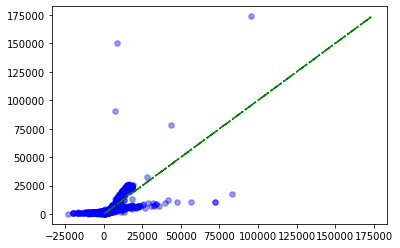

(5213,)
(5213,)


In [91]:
feature_cols = ['price_aprox_usd', 'surface_covered_in_m2', 'surface_total_in_m2', 'rooms']
train_test_error(feature_cols, target)

RMSE: 4172.5623687488805
R2: 0.2730978924509676


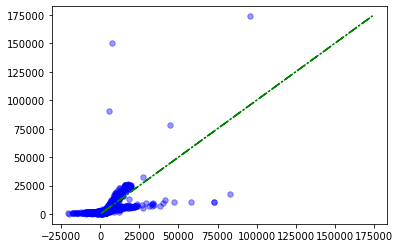

(5213,)
(5213,)


In [92]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']
train_test_error(feature_cols, target)

RMSE: 4054.279592567507
R2: 0.31372584324972264


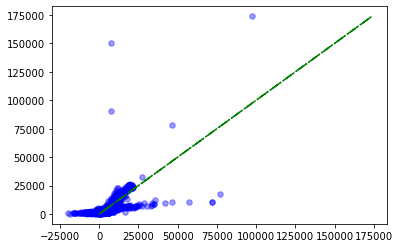

(5213,)
(5213,)


In [93]:
#Agregamos las dummies de place_name como variables
feature_cols.extend(feature_cols_places)
train_test_error(feature_cols, target)

RMSE: 4545.5978450708935
R2: 0.1373149437014164


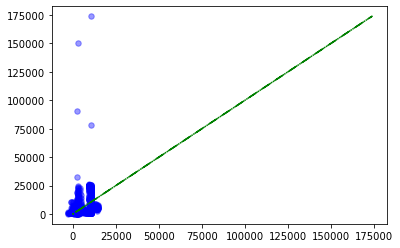

(5213,)
(5213,)


In [94]:
feature_cols = ['surface_covered_in_m2']
feature_cols.extend(feature_cols_places)
train_test_error(feature_cols, target)

RMSE: 4560.484369208732
R2: 0.1316552213429808


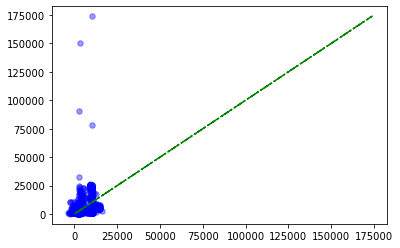

(5213,)
(5213,)


In [95]:
#agregamos también el tipo de propiedad
feature_cols.extend(feature_cols_prop)
train_test_error(feature_cols, target)

Observamos que al agregar más variables mejora un poco el resultado del R2 (ya no es negativo) pero de todas maneras es muy bajo.

<a id="section_test_lasso1"></a> 
<h3>Pruebas con modelo Lasso</h3>

[volver a TOC](#section_toc)

{'alpha': 1e-05, 'scores': array([0.15055345, 0.03142717, 0.1677786 ]), 'mean_score': 0.11658640655435477, 'zero_coefs': 0}
r^2: 0.05495647171597673
Imprime Alpha 1e-05


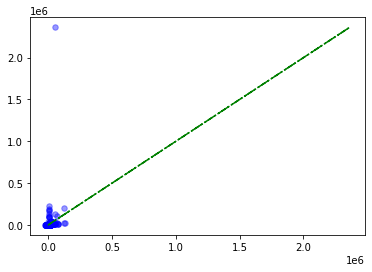

(15636,)
(15636,)


In [96]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']
train_test_error_lasso(feature_cols, target)

C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3675312252.9248047, tolerance: 589538321.2181045
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2248743629.3027344, tolerance: 582357555.5741918
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110870277.13775635, tolerance: 17611017.975831863
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_

{'alpha': 0.1, 'scores': array([0.08192352, 0.02954277, 0.16645024]), 'mean_score': 0.09263884457000211, 'zero_coefs': 14}
r^2: 0.05858101760073042
Imprime Alpha 0.1


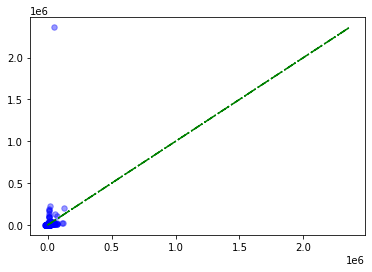

(15636,)
(15636,)


In [97]:
feature_cols.extend(feature_cols_places) 
train_test_error_lasso(feature_cols, target)

In [98]:
# feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
#                 'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
# train_test_error_lasso(feature_cols, target)

<a id="section_outliers"></a> 
<h3>Definción de outliers</h3>

[volver a TOC](#section_toc)

Luego de estas pruebas, notamos que es necesario definir y eliminar Outiliers tanto en el target como en algunas de las variables

<h4>Price_usd_per_m2</h4>

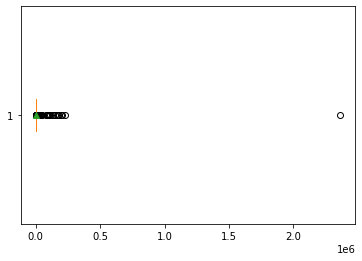

In [99]:
fig, ax = plt.subplots()
bp = ax.boxplot(data_caba_clean['price_usd_per_m2'].dropna(), vert=False, showmeans=True)

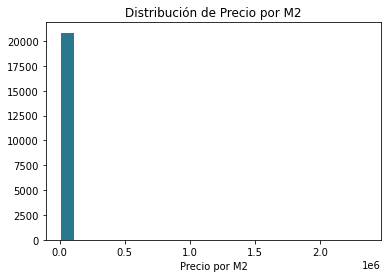

In [100]:
#Grafico de distribución de la variable target antes de eliminar datos extremos
plt.hist(data_caba_clean.price_usd_per_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.title('Distribución de Precio por M2')
plt.xlabel('Precio por M2')

plt.show()

In [101]:
# Definimos outliers aproximados
lower_bound = 0.01
upper_bound = 0.96
rest = data_caba_clean.price_usd_per_m2.quantile([lower_bound, upper_bound])
rest

0.01     830.497107
0.96    7990.852273
Name: price_usd_per_m2, dtype: float64

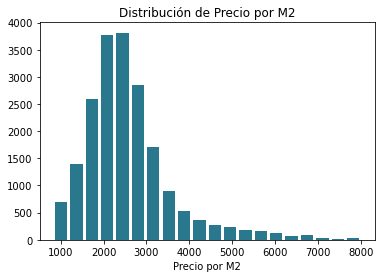

7990.056818181817
832.5832583258326


In [102]:
# Creamos una mask entendiendo que los precios minimos y maximos pueden rondar los 600 USD y 4000 USD y fijamos outliers aproximados

precioxm2_mask = (data_caba_clean.price_usd_per_m2 >= rest[0.01]) & (data_caba_clean.price_usd_per_m2 <= rest[0.96])
data_caba_clean = data_caba_clean.loc[precioxm2_mask, :]

# Volvemos a graficar

plt.hist(data_caba_clean.price_usd_per_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.title('Distribución de Precio por M2')
plt.xlabel('Precio por M2')

plt.show()

print(data_caba_clean.price_usd_per_m2.max()) 
print(data_caba_clean.price_usd_per_m2.min())

# Parece una distribución normal? sino fuera por los valores elevados que tenemos a partir de los 4000...

<h4>Surface_covered_in_m2</h4>

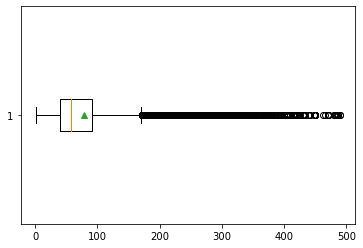

In [103]:
fig, ax = plt.subplots()
bp = ax.boxplot(data_caba_clean['surface_covered_in_m2'].dropna(), vert=False, showmeans=True)

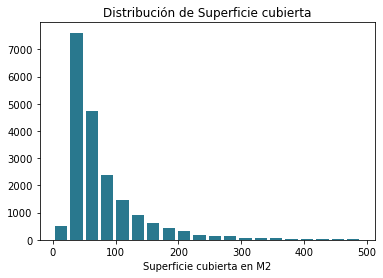

In [104]:
#Grafio de la distribucion de superficie antes de eliminar outliers
plt.hist(data_caba_clean.surface_covered_in_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.title('Distribución de Superficie cubierta')
plt.xlabel('Superficie cubierta en M2')
plt.show()

In [105]:
# Definimos outliers aproximados
lower_bound = 0.001
upper_bound = 0.99
rest = data_caba_clean.surface_covered_in_m2.quantile([lower_bound, upper_bound])
rest

0.001     17.0
0.990    340.0
Name: surface_covered_in_m2, dtype: float64

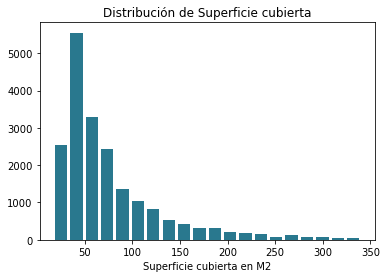

340.0
17.0


In [106]:
surface_xm2_mask = (data_caba_clean.surface_covered_in_m2 >= rest[0.001]) & (data_caba_clean.surface_covered_in_m2 <= rest[0.99])
data_caba_clean = data_caba_clean.loc[surface_xm2_mask, :]

# Graficamos la distribución actual de superficie cubierta

plt.hist(data_caba_clean.surface_covered_in_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.title('Distribución de Superficie cubierta')
plt.xlabel('Superficie cubierta en M2')
plt.show()

print(data_caba_clean.surface_covered_in_m2.max()) 
print(data_caba_clean.surface_covered_in_m2.min())

# Parece una distribución normal? sino fuera por los valores elevados que tenemos a partir de los 3500...

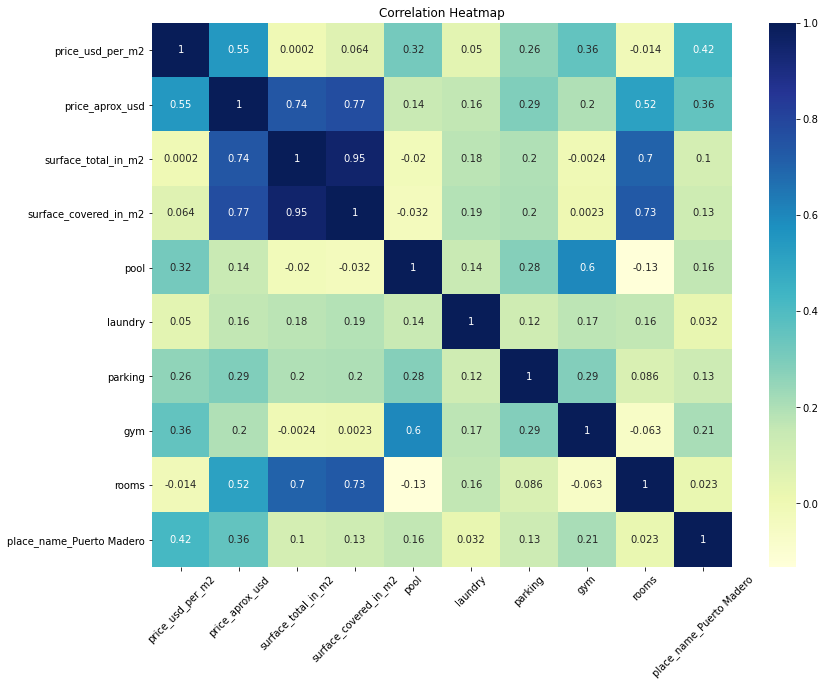

In [107]:
#Nuevo mapa de correlación
X = data_caba_clean[['price_usd_per_m2','price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
        'pool', 'laundry', 'parking', 'gym', 'rooms', 'place_name_Puerto Madero']]

g = plt.figure(figsize=(13,10))
g = sns.heatmap(X.corr(),annot=True, cmap="YlGnBu")
g.set_xticklabels(X.columns, rotation=45)
plt.title("Correlation Heatmap")
plt.show()

Volvemos a definir las dummies de 'rooms' ya que cambiaron los valores de superficie

In [108]:
rooms_dummies = pd.get_dummies(data_caba_clean['rooms'], drop_first = True, prefix = 'rooms')

In [109]:
feature_cols_rooms =list(rooms_dummies.columns)

<a id="section_test2"></a> 
<h3>Nuevas pruebas con datos ajustados</h3>

[volver a TOC](#section_toc)

RMSE: 873.1201722688472
R2: 0.27264390642451575


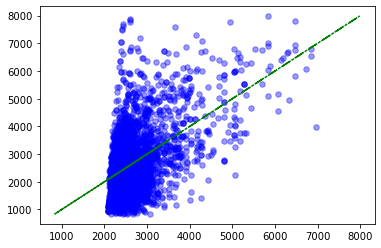

(4899,)
(4899,)


In [110]:
#Regresión lineal simple con datos ajustados. Aún con una sola variable notamos una mejora sustancial
feature_cols = ['price_aprox_usd']
train_test_error(feature_cols, target)

RMSE: 571.9983155816147
R2: 0.6878318884854155


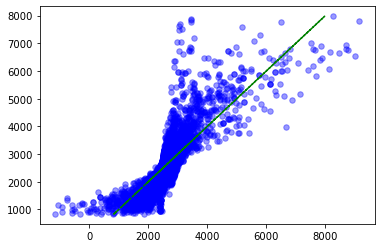

(4899,)
(4899,)


In [111]:
#Regresión lineal con variables base
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']
train_test_error(feature_cols, target)

RMSE: 571.8780878264827
R2: 0.687963103301679


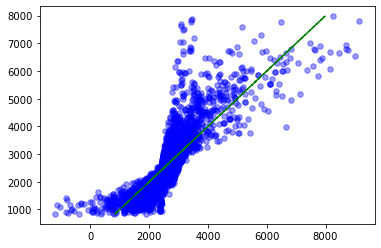

(4899,)
(4899,)


In [112]:
#Regresión lineal con variables base
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'rooms']
train_test_error(feature_cols, target)

RMSE: 523.1436672878657
R2: 0.7388794917862114


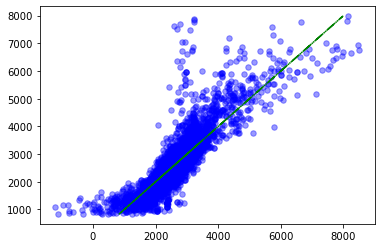

(4899,)
(4899,)


In [113]:
#Agregamos a las features de arriba las dummies de place_name
feature_cols.extend(feature_cols_places)
train_test_error(feature_cols, target)

RMSE: 515.1053430311657
R2: 0.7468422968557744


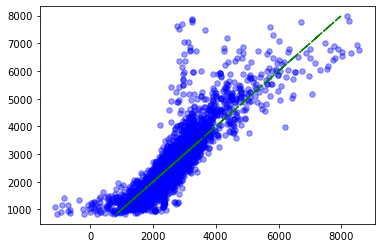

(4899,)
(4899,)


In [114]:
#Agregamos las dummies de prop_type
feature_cols.extend(feature_cols_prop)
train_test_error(feature_cols, target)

RMSE: 508.31033788227234
R2: 0.7534772963559541


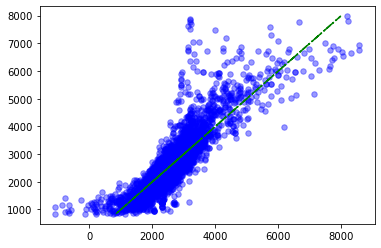

(4899,)
(4899,)


In [115]:
#Prueba de Regresión lineal con todas las dummies y todas las variables
feature_cols.extend(feature_cols_labels)
train_test_error(feature_cols, target)

RMSE: 509.20427752174453
R2: 0.752609439919447


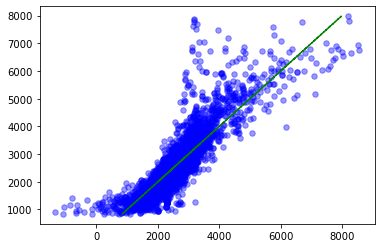

(4899,)
(4899,)


In [116]:
feature_cols.extend(feature_cols_rooms)
train_test_error(feature_cols, target)

<a id="section_test_lasso2"></a> 
<h3>Nuevas pruebas de Modelo Lasso con datos ajustados</h3>

[volver a TOC](#section_toc)

{'alpha': 0.0015113513513513516, 'scores': array([0.69126764, 0.69106682, 0.68049827]), 'mean_score': 0.6876109128347911, 'zero_coefs': 0}
r^2: 0.6883546507376208
Imprime Alpha 0.0015113513513513516


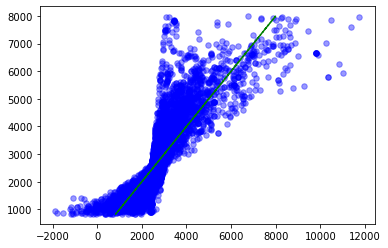

(14695,)
(14695,)


In [117]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']
train_test_error_lasso(feature_cols, target)

{'alpha': 0.027034324324324326, 'scores': array([0.74762534, 0.73782784, 0.73954416]), 'mean_score': 0.7416657786947244, 'zero_coefs': 12}
r^2: 0.7441908830100739
Imprime Alpha 0.027034324324324326


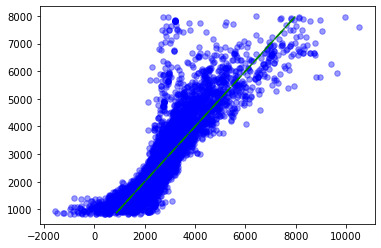

(14695,)
(14695,)


In [118]:
feature_cols.extend(feature_cols_places)
train_test_error_lasso(feature_cols, target)

{'alpha': 0.016925225225225226, 'scores': array([0.75197716, 0.74415706, 0.74487031]), 'mean_score': 0.7470015131068433, 'zero_coefs': 6}
r^2: 0.7503174480443562
Imprime Alpha 0.016925225225225226


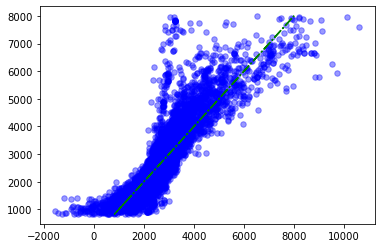

(14695,)
(14695,)


In [119]:
feature_cols.extend(feature_cols_prop)
train_test_error_lasso(feature_cols, target)

{'alpha': 0.006415765765765766, 'scores': array([0.75952393, 0.75034384, 0.74920148]), 'mean_score': 0.7530230846245293, 'zero_coefs': 4}
r^2: 0.7562755733441642
Imprime Alpha 0.006415765765765766


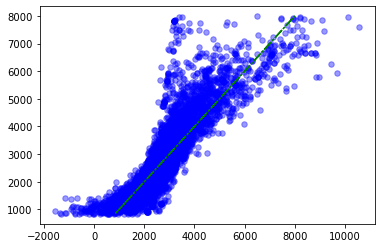

(14695,)
(14695,)


In [120]:
feature_cols.extend(feature_cols_labels)
train_test_error_lasso(feature_cols, target)

C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1162934936.5176737, tolerance: 1283267.0358562246
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44883569.43439865, tolerance: 1271393.4195046455
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 984005319.3772893, tolerance: 1271393.4195046455
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1716855.6136159897, tolerance: 832581.4495107594
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11747234.959506989, tolerance: 832581.4495107594
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39417045.020055294, tolerance: 832581.4495107594
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_d

{'alpha': 0.001911711711711712, 'scores': array([0.76313981, 0.75246443, 0.75003606]), 'mean_score': 0.7552134317640545, 'zero_coefs': 1}
r^2: 0.7595755022746188
Imprime Alpha 0.001911711711711712


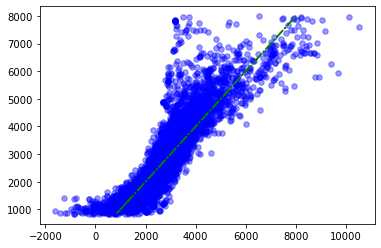

(14695,)
(14695,)


In [121]:
feature_cols.extend(feature_cols_rooms)
train_test_error_lasso(feature_cols, target)

Los resultados con Lasso son muy parecidos a los de las LinearRegression, pero no la mejoran

<a id="section_test_ridge"></a> 
<h3>Pruebas con modelo Ridge</h3>

[volver a TOC](#section_toc)

{'alpha': 0.00041036036036036044, 'scores': array([0.62627931, 0.62081823, 0.61135331]), 'mean_score': 0.6194836196538125, 'zero_coefs': 0}
r^2: 0.6199146739708659
Coeficientes de la regresión [ 5.62681766e-03 -1.65885544e+01]


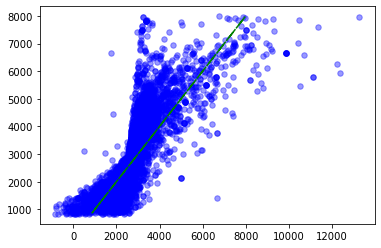

(14695,)
(14695,)


In [122]:
feature_cols = ['price_aprox_usd', 'surface_covered_in_m2']
train_test_error_ridge(feature_cols, target)

{'alpha': 0.0009108108108108109, 'scores': array([0.69244561, 0.69177709, 0.68001714]), 'mean_score': 0.688079945776399, 'zero_coefs': 0}
r^2: 0.6888081656822538
Coeficientes de la regresión [ 5.29648669e-03 -1.12876152e+01 -3.28602996e+00  1.97338658e+02
 -2.52102609e+01  1.20672584e+02  1.92856071e+02  2.82473970e+01]


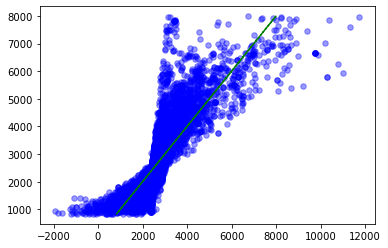

(14695,)
(14695,)


In [123]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'rooms']
train_test_error_ridge(feature_cols, target)

{'alpha': 0.0007106306306306308, 'scores': array([0.74931982, 0.73922062, 0.73938021]), 'mean_score': 0.7426402146637687, 'zero_coefs': 0}
r^2: 0.7457117077524014
Coeficientes de la regresión [ 4.30354417e-03 -1.01455132e+01 -2.76016279e+00  1.65757688e+02
 -2.98735929e+01  1.32381068e+02  1.98738321e+02  3.87582813e+01
  1.30074191e+02  8.85712589e+01 -7.75452738e+01 -5.17398823e+01
  5.15632553e+02  5.29567970e+02 -3.34876509e+02  1.94578555e+02
  1.69368095e+02  8.73073647e+02  1.00045529e+02  2.30942691e+01
  2.37873396e+02  2.94473386e+02 -1.75869960e+02 -3.38994028e+02
 -3.51109991e+01 -1.15134314e+02  8.30825625e+02 -1.02571362e+02
 -1.26170282e+01 -3.63930435e+01  8.35891366e+01  4.03440869e+02
 -1.42626477e+02  5.71813085e+02  7.81284761e+02  5.74540629e+02
  6.45633329e+02  4.71778898e+02 -1.78588452e+02  1.98670436e+02
 -5.55976283e+01 -2.47423077e+01 -2.11234425e+02 -2.29922910e+01
 -7.84739357e+01  1.25494581e+03  6.64568567e+02  2.70723924e+02
  1.64314457e+02  1.82777273

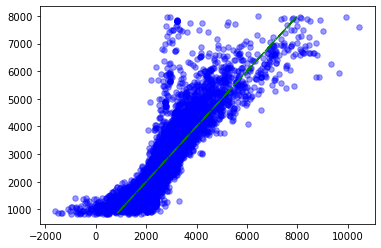

(14695,)
(14695,)


In [124]:
#Prueba de Ridge con variables base + dummies de place_name
feature_cols.extend(feature_cols_places)
train_test_error_ridge(feature_cols, target)

{'alpha': 0.0008107207207207209, 'scores': array([0.75435247, 0.74633542, 0.74516004]), 'mean_score': 0.7486159805134669, 'zero_coefs': 0}
r^2: 0.7521044776105177
Coeficientes de la regresión [ 4.49884121e-03 -1.08893761e+01 -3.37565854e+00  1.63510545e+02
 -2.59469232e+01  1.31686869e+02  1.99523678e+02  4.75778120e+01
  1.20522484e+02  9.07534361e+01 -6.45443928e+01 -4.94713979e+01
  5.31672402e+02  5.34275486e+02 -3.51308672e+02  1.71464380e+02
  1.70884686e+02  1.09602983e+03  1.09122408e+02  9.63714629e+00
  2.14207244e+02  2.71271010e+02 -1.53572561e+02 -3.37945031e+02
 -4.41928771e+01 -1.58387266e+02  8.35360823e+02 -1.52964663e+02
 -1.04558298e+02 -2.88555742e+01  4.42146714e+01  3.90878432e+02
 -1.22518758e+02  5.69515662e+02  7.86705976e+02  5.64257296e+02
  6.41487139e+02  4.26037173e+02 -2.64666541e+02  2.16347446e+02
 -1.15212973e+02 -9.25665327e+01 -2.23707841e+02 -5.66009478e+01
 -1.99170069e+02  1.22570397e+03  6.86236034e+02  3.01935494e+02
  1.38382712e+02  1.72496485

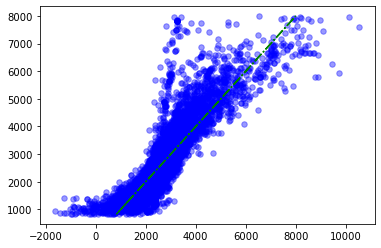

(14695,)
(14695,)


In [125]:
#Prueba de Ridge con variables base + dummies de place_name + dummies de prop_type
feature_cols.extend(feature_cols_prop)
train_test_error_ridge(feature_cols, target)

{'alpha': 0.0014112612612612616, 'scores': array([0.75391523, 0.74504168, 0.74466238]), 'mean_score': 0.7478730976410496, 'zero_coefs': 0}
r^2: 0.7524177520360049
Coeficientes de la regresión [ 4.50583272e-03 -1.08325774e+01 -3.45321821e+00  1.60723087e+02
 -2.20830382e+01  1.32527669e+02  2.00692556e+02  1.49436771e+01
  9.53331651e+01  6.46215922e+01 -9.09728577e+01 -7.34605935e+01
  5.05338738e+02  5.08915564e+02 -3.74349526e+02  1.37999077e+02
  1.45496620e+02  1.07686257e+03  7.71599367e+01 -1.92463785e+01
  1.87469202e+02  2.44163760e+02 -1.86010565e+02 -3.71038682e+02
 -6.81150123e+01 -1.82724408e+02  8.08879338e+02 -1.76195342e+02
 -1.29863401e+02 -5.97797934e+01  1.99814082e+01  3.63100215e+02
 -1.47481407e+02  5.44036003e+02  7.57519819e+02  5.36637871e+02
  6.11006861e+02  4.03815065e+02 -2.95357787e+02  1.91934924e+02
 -1.41412985e+02 -1.27618493e+02 -2.46621286e+02 -8.78195340e+01
 -2.18021167e+02  1.20123225e+03  6.55827223e+02  2.74429153e+02
  1.10309895e+02  1.40556449

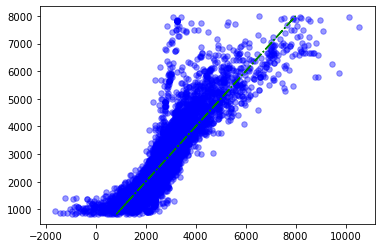

(14695,)
(14695,)


In [126]:
feature_cols.extend(feature_cols_rooms)
train_test_error_ridge(feature_cols, target)

Lo mismo se observa con el modelo Ridge, los resultados obtenidos son muy similares, pero no mejoran el modelo inicial. 

<a id="section_test_elastic"></a> 
<h3>Pruebas con modelo Elastic</h3>

[volver a TOC](#section_toc)

{'alpha': 0.0047769010801635165, 'scores': array([0.6912768 , 0.69103506, 0.6805193 ]), 'mean_score': 0.6876103879357696, 'zero_coefs': 0}
r^2: 0.6883318877442488
Coeficientes de la regresión [ 5.28829816e-03 -1.13195941e+01 -2.71649647e+00  1.87971385e+02
 -2.06856247e+01  1.16981701e+02  1.93145409e+02]


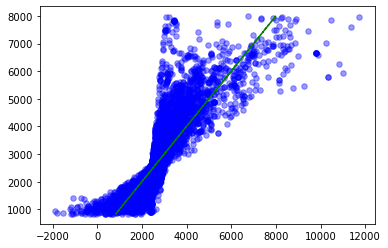

(14695,)
(14695,)


In [127]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']
train_test_error_elastic(feature_cols, target)

{'alpha': 0.027335184253042825, 'scores': array([0.74788427, 0.7378269 , 0.7395369 ]), 'mean_score': 0.7417493549217956, 'zero_coefs': 12}
r^2: 0.7441802421393207
Coeficientes de la regresión [ 4.29792508e-03 -1.01731820e+01 -1.91972125e+00  1.58290399e+02
 -1.56959964e+01  1.25078106e+02  1.93739380e+02 -0.00000000e+00
 -4.90339946e+01 -2.03248673e+02 -1.77459945e+02  3.44336723e+02
  3.64648916e+02 -4.33719112e+02  0.00000000e+00  1.00919426e+01
  2.39155824e+02 -1.50488210e+01 -9.40755031e+01  5.15440638e+01
  1.05739792e+02 -2.94640864e+02 -4.65999249e+02 -1.72457933e+02
 -2.36574190e+02  6.29318108e+02 -2.20944952e+02 -1.38329921e+02
 -1.75105159e+02 -1.54544214e+01  2.25620940e+02 -2.55992133e+02
  4.06554237e+02  5.69423447e+02  3.98670501e+02  4.53424968e+02
  2.28618282e+02 -2.60550044e+02  0.00000000e+00 -1.60028657e+02
 -1.31713205e+02 -3.12046410e+02 -1.38534971e+02 -1.26100967e+02
  1.05919535e+03  4.92515489e+02  7.07736973e+01  0.00000000e+00
  0.00000000e+00 -6.64071600

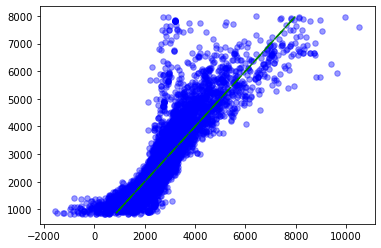

(14695,)
(14695,)


In [128]:
feature_cols.extend(feature_cols_places)
train_test_error_elastic(feature_cols, target)

{'alpha': 0.01677261558783347, 'scores': array([0.75226813, 0.74414187, 0.74484902]), 'mean_score': 0.747086337108071, 'zero_coefs': 6}
r^2: 0.7503229274070633
Coeficientes de la regresión [ 4.47286465e-03 -1.08325537e+01 -2.36554500e+00  1.53854307e+02
 -1.47410893e+01  1.26023745e+02  1.96993955e+02 -0.00000000e+00
 -2.44958230e+01 -1.69088915e+02 -1.57562122e+02  3.95111578e+02
  4.02422062e+02 -4.34619250e+02  8.91794915e+00  4.53397297e+01
  6.17047259e+02 -0.00000000e+00 -9.36455949e+01  7.14636249e+01
  1.24007857e+02 -2.56825105e+02 -4.54958152e+02 -1.56194810e+02
 -2.54555490e+02  6.78091200e+02 -2.50809034e+02 -2.06080892e+02
 -1.54061604e+02 -4.59980951e+01  2.50265962e+02 -2.26044573e+02
  4.37661337e+02  6.18777934e+02  4.28603391e+02  4.87563860e+02
  2.50667119e+02 -3.32256817e+02  6.24481945e+01 -1.98537514e+02
 -1.93996826e+02 -3.02698976e+02 -1.57267597e+02 -2.33234764e+02
  1.06735745e+03  5.47240718e+02  1.44739155e+02  0.00000000e+00
  2.21767659e+01 -3.22492857e+0

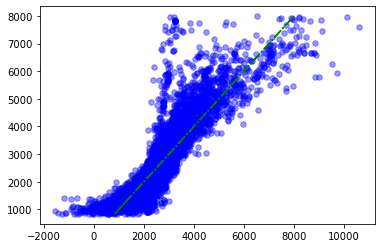

(14695,)
(14695,)


In [129]:
feature_cols.extend(feature_cols_prop)
train_test_error_elastic(feature_cols, target)

{'alpha': 0.006314782100019972, 'scores': array([0.75956108, 0.75034553, 0.74919303]), 'mean_score': 0.7530332115762848, 'zero_coefs': 4}
r^2: 0.7562786526226638
Coeficientes de la regresión [ 4.45256127e-03 -1.08399167e+01 -2.89373710e+00  1.60365270e+02
 -9.19932014e+00  1.28613804e+02  1.97805995e+02  1.88937697e+01
 -0.00000000e+00 -1.51492413e+02 -1.16649278e+02  4.27891732e+02
  4.43566097e+02 -4.22026150e+02  2.66726558e+01  8.78735204e+01
  7.94334813e+02 -2.27882650e+01 -5.86355461e+01  1.33490480e+02
  1.76769748e+02 -2.32948867e+02 -4.37803196e+02 -1.28159871e+02
 -2.24610090e+02  7.17967209e+02 -2.14865017e+02 -1.80143371e+02
 -1.33370997e+02 -2.60905448e+01  3.08223650e+02 -2.05731703e+02
  4.78743724e+02  6.55265801e+02  4.86815616e+02  4.89472147e+02
  2.81272808e+02 -3.14124048e+02  1.29161180e+02 -1.72460265e+02
 -1.75166108e+02 -2.68434824e+02 -1.57814087e+02 -2.45589573e+02
  1.11768307e+03  5.76540514e+02  1.96958451e+02  5.63177518e+01
  7.64248560e+01 -2.50562467e

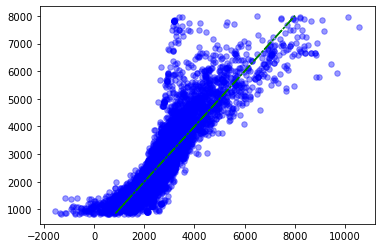

(14695,)
(14695,)


In [130]:
feature_cols.extend(feature_cols_labels)
train_test_error_elastic(feature_cols, target)

{'alpha': 0.0047769010801635165, 'scores': array([0.76300026, 0.75245559, 0.75035339]), 'mean_score': 0.7552697478796646, 'zero_coefs': 3}
r^2: 0.7595113222180164
Coeficientes de la regresión [ 4.46284106e-03 -1.09168026e+01 -3.53139790e+00  1.75069528e+02
 -1.33979077e+01  1.37097298e+02  1.94620413e+02  2.83269256e+01
  0.00000000e+00 -1.66999100e+02 -1.07081207e+02  4.31762275e+02
  4.43583654e+02 -4.35638162e+02  6.16059221e+01  8.30361317e+01
  8.77393124e+02 -2.27475694e+01 -6.38821899e+01  1.26071736e+02
  1.89123749e+02 -2.40777334e+02 -4.14385909e+02 -1.34420407e+02
 -2.36753482e+02  7.27346676e+02 -2.18857287e+02 -1.90319433e+02
 -1.04172965e+02 -3.21552930e+01  3.12183587e+02 -2.04628395e+02
  4.78631751e+02  6.63799038e+02  4.84085003e+02  4.99749992e+02
  2.84467997e+02 -3.27253002e+02  1.20155255e+02 -1.85487267e+02
 -1.42989480e+02 -2.91401102e+02 -1.58071246e+02 -2.68795670e+02
  1.13325524e+03  5.81631575e+02  1.99539113e+02  6.01208491e+01
  8.46624015e+01 -4.37488935

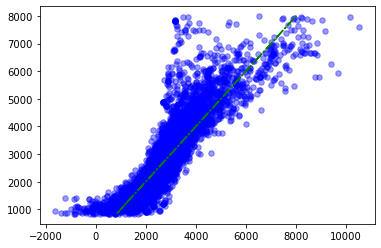

(14695,)
(14695,)


In [131]:
feature_cols.extend(feature_cols_rooms)
train_test_error_elastic(feature_cols, target)

<a id="section_new_features"></a> 
<h3>Creación de features para complejizar el modelo</h3>

[volver a TOC](#section_toc)

Creamos nuevas features para complejizar el modelo y testeamos nuevamente con todos los modelos

<a id="section_sup2"></a> 
<h4>Superficie<sup>2</sup></h4>

[volver a TOC](#section_toc)

In [132]:
#Creo una nueva feature a partir de una existente para complejizar el modelo y tratar de obtener un R^2 más elevado
data_caba_clean['surface_covered_in_m2_2']=data_caba_clean['surface_covered_in_m2']**2
data_caba_clean['surface_covered_in_m2_3']=data_caba_clean['surface_covered_in_m2']**3
data_caba_clean.head()

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,m2_categories,m2_labels,pool,laundry,parking,gym,prop_type_apartment,prop_type_house,prop_type_store,m2_label_s45,m2_label_s75,m2_label_s150,m2_label_s220,m2_label_s500,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boca,place_name_Boedo,place_name_Caballito,place_name_Catalinas,place_name_Centro / Microcentro,place_name_Chacarita,place_name_Coghlan,place_name_Colegiales,place_name_Congreso,place_name_Constitución,place_name_Flores,place_name_Floresta,place_name_Las Cañitas,place_name_Liniers,place_name_Mataderos,place_name_Monserrat,place_name_Monte Castro,place_name_Nuñez,place_name_Once,place_name_Palermo,place_name_Palermo Chico,place_name_Palermo Hollywood,place_name_Palermo Soho,place_name_Palermo Viejo,place_name_Parque Avellaneda,place_name_Parque Centenario,place_name_Parque Chacabuco,place_name_Parque Chas,place_name_Parque Patricios,place_name_Paternal,place_name_Pompeya,place_name_Puerto Madero,place_name_Recoleta,place_name_Retiro,place_name_Saavedra,place_name_San Cristobal,place_name_San Nicolás,place_name_San Telmo,place_name_Tribunales,place_name_Velez Sarsfield,place_name_Versalles,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa General Mitre,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,rooms_1.0,rooms_2.0,rooms_3.0,rooms_4.0,rooms_5.0,rooms_6.0,rooms_7.0,rooms_8.0,rooms_9.0,rooms_10.0,rooms_11.0,rooms_12.0,rooms_14.0,rooms_17.0,rooms_22.0,surface_covered_in_m2_2,surface_covered_in_m2_3
0,PH,Mataderos,62000.0,55.0,40.0,1127.272727,2.0,"2 ambientes tipo casa planta baja por pasillo,...","(30, 45]",s45,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1600.0,64000.0
2,apartment,Mataderos,72000.0,55.0,55.0,1309.090909,2.0,2 ambientes 3er piso lateral living comedor am...,"(45, 75]",s75,0.0,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3025.0,166375.0
13,apartment,Palermo Soho,111700.0,50.0,30.0,2234.000000,1.0,torre i mondrian. 3 ambientes con terraza y d...,"(0, 30]",s45,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900.0,27000.0
14,apartment,Palermo Soho,147900.0,42.0,31.0,3521.428571,1.0,torre ii dalí. ambiente unico divisible.vitrau...,"(30, 45]",s45,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,961.0,29791.0
16,PH,Mataderos,239000.0,140.0,98.0,1707.142857,4.0,ventas mataderos al frente duplex 4 amb.- plan...,"(75, 150]",s150,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9604.0,941192.0


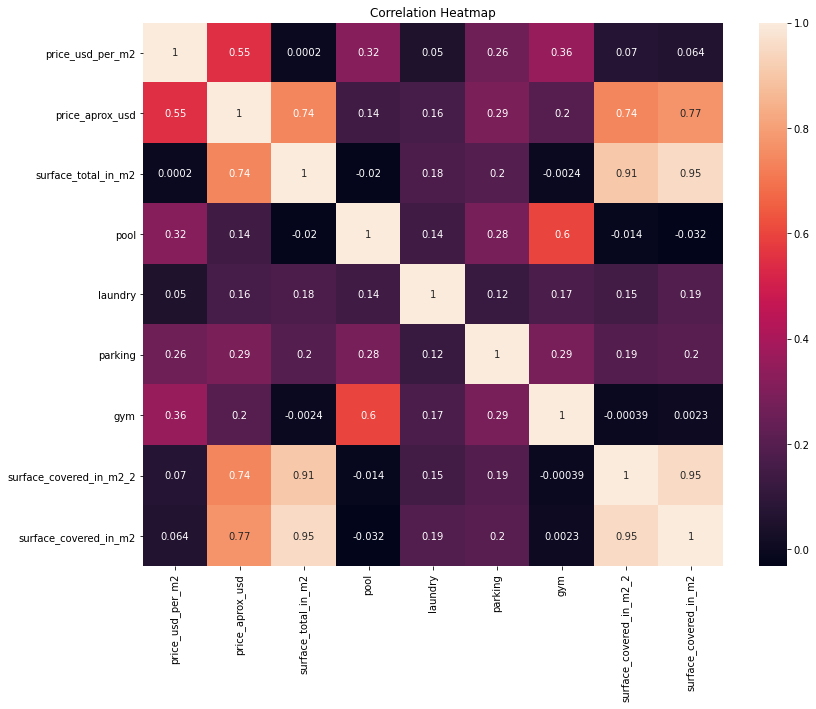

In [133]:
# tomo las nueva feature 'surface_covered_in_m2_2'
X = data_caba_clean[['price_usd_per_m2','price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                     'surface_covered_in_m2_2','surface_covered_in_m2']]

plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

RMSE: 572.4570330722828
R2: 0.6873309975292181


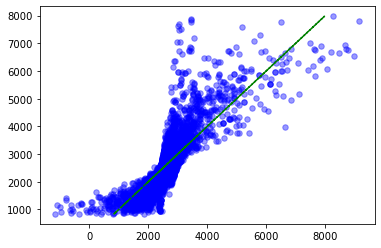

(4899,)
(4899,)


In [134]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2']
train_test_error(feature_cols, target)

{'alpha': 0.0015113513513513516, 'scores': array([0.69140995, 0.69066757, 0.68058561]), 'mean_score': 0.6875543758336993, 'zero_coefs': 0}
r^2: 0.6882820049091145
Imprime Alpha 0.0015113513513513516


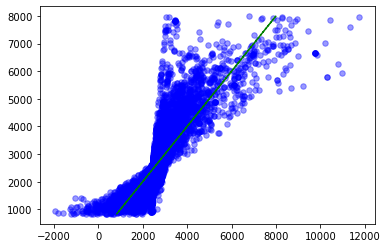

(14695,)
(14695,)


In [135]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2']
train_test_error_lasso(feature_cols, target)

{'alpha': 0.0013111711711711713, 'scores': array([0.6916294 , 0.69055918, 0.6806518 ]), 'mean_score': 0.6876134585296946, 'zero_coefs': 0}
r^2: 0.6882120717825664
Coeficientes de la regresión [ 5.28039531e-03 -1.11847782e+01  1.90226734e+02 -2.36973764e+01
  1.17931445e+02  1.94186899e+02 -2.35530327e+00 -1.89119248e-03]


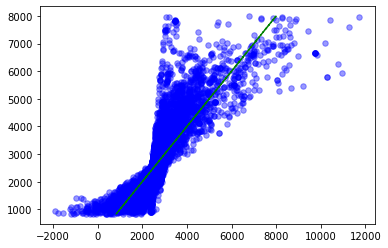

(14695,)
(14695,)


In [136]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2']
train_test_error_ridge(feature_cols, target)

RMSE: 522.3371470351499
R2: 0.7396839998144689


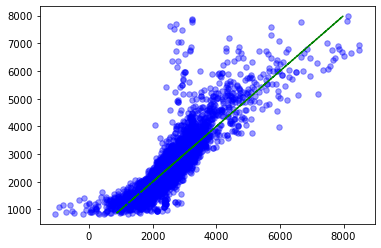

(4899,)
(4899,)


In [137]:
#Pruebo con todas las features y con la creada surface_covered_in_m2_2
feature_cols.extend(feature_cols_places)
train_test_error(feature_cols, target)

RMSE: 515.3319811017071
R2: 0.7466194772083501


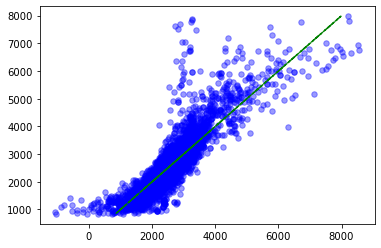

(4899,)
(4899,)


In [138]:
feature_cols.extend(feature_cols_prop)
train_test_error(feature_cols, target)

{'alpha': 0.01912720720720721, 'scores': array([0.7521729 , 0.74415592, 0.74502268]), 'mean_score': 0.7471171630039724, 'zero_coefs': 7}
r^2: 0.7502328498444095
Imprime Alpha 0.01912720720720721


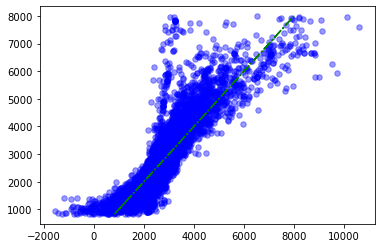

(14695,)
(14695,)


In [139]:
train_test_error_lasso(feature_cols, target)

{'alpha': 0.0008107207207207209, 'scores': array([0.75231808, 0.74447307, 0.74485927]), 'mean_score': 0.7472168070585079, 'zero_coefs': 0}
r^2: 0.7509218379310663
Coeficientes de la regresión [ 4.46426515e-03 -1.07682557e+01  1.50223766e+02 -1.73290212e+01
  1.30062679e+02  2.03129650e+02 -3.15618120e+00  2.37338465e-03
  9.79574670e+01  8.62250211e+01 -5.90243488e+01 -5.21855113e+01
  5.31528188e+02  5.33426439e+02 -3.44614513e+02  1.36761365e+02
  1.73395610e+02  9.68946624e+02  9.82509968e+01 -9.20696284e-01
  2.09207144e+02  2.59215271e+02 -1.53439183e+02 -3.63624318e+02
 -4.54546555e+01 -1.52094758e+02  8.28101370e+02 -1.56803657e+02
 -1.17045007e+02 -5.42353320e+01  3.48113298e+01  3.84666342e+02
 -1.29970099e+02  5.67709059e+02  7.75696084e+02  5.64357349e+02
  6.22815391e+02  4.26800689e+02 -2.56872405e+02  2.21319005e+02
 -1.05606245e+02 -1.24014158e+02 -2.04459443e+02 -6.77735859e+01
 -1.71627574e+02  1.21757935e+03  6.83945117e+02  2.98785908e+02
  1.32114730e+02  1.54798764

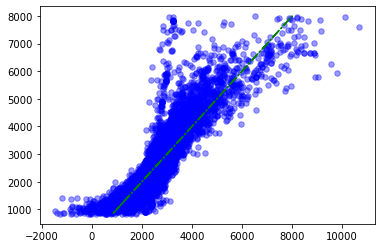

(14695,)
(14695,)


In [140]:
train_test_error_ridge(feature_cols, target)

{'alpha': 0.019284432103228635, 'scores': array([0.75238007, 0.74414009, 0.7450207 ]), 'mean_score': 0.7471802877758696, 'zero_coefs': 7}
r^2: 0.7502264724979462
Coeficientes de la regresión [ 4.46939281e-03 -1.08217193e+01  1.54240020e+02 -1.40966481e+01
  1.25443917e+02  1.96410313e+02 -2.34786070e+00  0.00000000e+00
 -0.00000000e+00 -2.48290523e+01 -1.69252206e+02 -1.56772634e+02
  3.91371833e+02  3.99519345e+02 -4.32102882e+02  5.09888118e+00
  4.25842011e+01  5.73236974e+02 -0.00000000e+00 -9.14743404e+01
  6.71350426e+01  1.20007314e+02 -2.56127794e+02 -4.52933005e+02
 -1.56482533e+02 -2.53378981e+02  6.72280775e+02 -2.48488414e+02
 -2.03333663e+02 -1.53122353e+02 -4.17106193e+01  2.46869963e+02
 -2.24231815e+02  4.34934187e+02  6.12758551e+02  4.24764152e+02
  4.83360019e+02  2.41592785e+02 -3.26818391e+02  5.50243244e+01
 -1.95646404e+02 -1.88189633e+02 -3.01218833e+02 -1.54607519e+02
 -2.25502490e+02  1.06397432e+03  5.43597917e+02  1.38358973e+02
  0.00000000e+00  1.81778005e

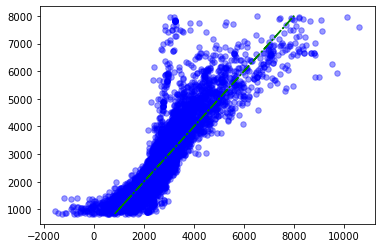

(14695,)
(14695,)


In [141]:
train_test_error_elastic(feature_cols, target)

<a id="section_sup3"></a> 
<h4>Superficie<sup>3</sup></h4>

[volver a TOC](#section_toc)

In [142]:
# agrego una nueva feature ('surface_covered_in_m2_3')

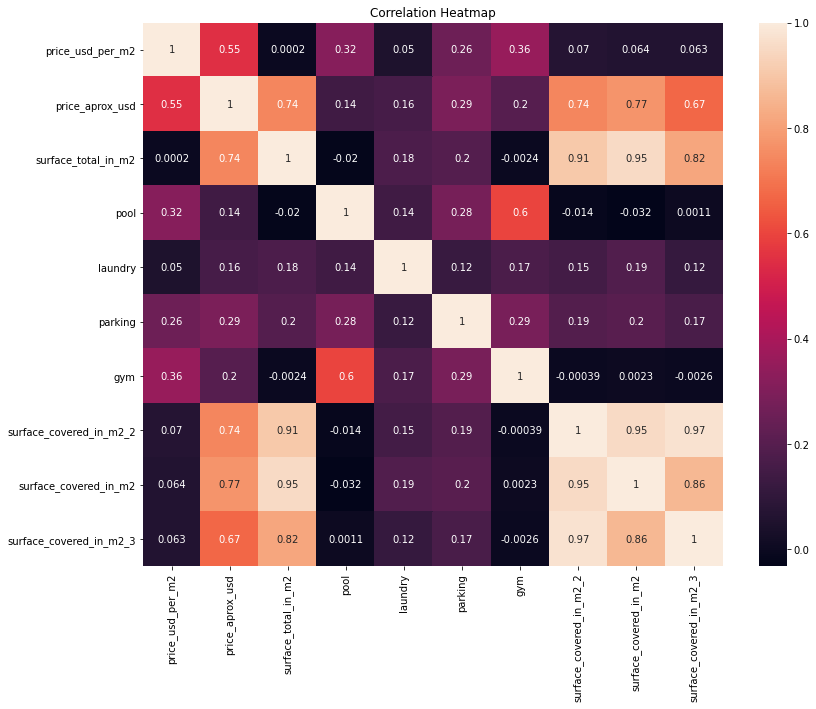

In [143]:
X = data_caba_clean[['price_usd_per_m2','price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                     'surface_covered_in_m2_2','surface_covered_in_m2','surface_covered_in_m2_3']]

plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

RMSE: 573.351733589421
R2: 0.6863528849000945


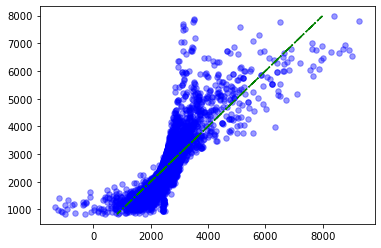

(4899,)
(4899,)


In [144]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2','surface_covered_in_m2_3']
train_test_error(feature_cols, target)

C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1960385.401342392, tolerance: 1283267.0358562246
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134332490.51771498, tolerance: 1283267.0358562246
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1576552.8179769516, tolerance: 1271393.4195046455
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate

C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1343412.1737689972, tolerance: 832581.4495107594
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91194489.26795912, tolerance: 832581.4495107594
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1363944.2932987213, tolerance: 836903.8122634771
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_de

{'alpha': 1e-05, 'scores': array([0.69396102, 0.6911949 , 0.68462271]), 'mean_score': 0.6899262105362055, 'zero_coefs': 0}
r^2: 0.6900278137235917
Imprime Alpha 1e-05


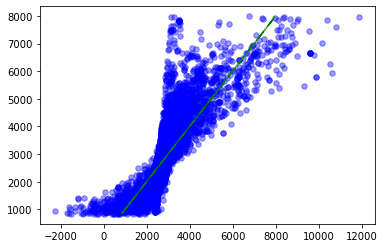

(14695,)
(14695,)


In [145]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2','surface_covered_in_m2_3']
train_test_error_lasso(feature_cols, target)

{'alpha': 0.0001100900900900901, 'scores': array([0.69397079, 0.69126774, 0.68460409]), 'mean_score': 0.6899475397331377, 'zero_coefs': 0}
r^2: 0.6900416426784761
Coeficientes de la regresión [ 5.29602200e-03 -1.11683558e+01  1.92889972e+02 -2.10866017e+01
  1.13936610e+02  1.91495719e+02 -9.57987161e+00  5.87698107e-02
 -1.35479641e-04]


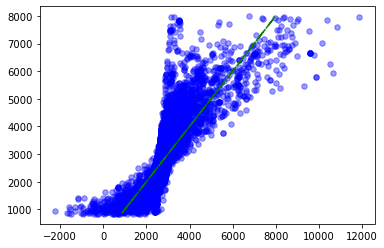

(14695,)
(14695,)


In [146]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2','surface_covered_in_m2_3']
train_test_error_ridge(feature_cols, target)

RMSE: 514.4852347266092
R2: 0.7474514565280015


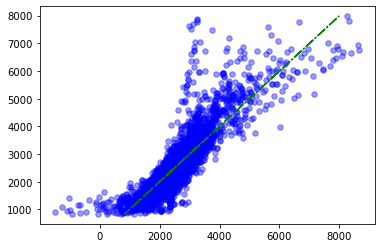

(4899,)
(4899,)


In [147]:
# con todas las features
feature_cols.extend(feature_cols_places)
feature_cols.extend(feature_cols_prop)
feature_cols.extend(feature_cols_rooms)
train_test_error(feature_cols, target)

C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1916719.4067878723, tolerance: 1283267.0358562246
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3936437.066467285, tolerance: 1283267.0358562246
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31670763.78049183, tolerance: 1283267.0358562246
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1441131.13833189, tolerance: 859098.8256345867
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11711677.766418934, tolerance: 859098.8256345867
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32238056.595745564, tolerance: 859098.8256345867
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 834629.9275462627, tolerance: 832581.4495107594
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1362860.30148077, tolerance: 832581.4495107594
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2769856.9388632774, tolerance: 832581.4495107594
  tol, rng, random, positive)
C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_desc

{'alpha': 0.0005104504504504506, 'scores': array([0.75771678, 0.74720576, 0.747322  ]), 'mean_score': 0.7507481784736486, 'zero_coefs': 1}
r^2: 0.755224296448344
Imprime Alpha 0.0005104504504504506


C:\Users\Ignacio\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464864600.3110204, tolerance: 1056312.8060884315
  positive)


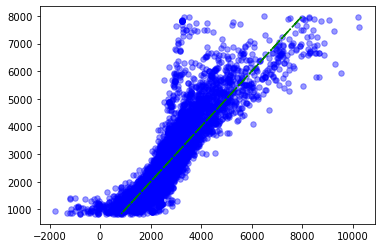

(14695,)
(14695,)


In [148]:
train_test_error_lasso(feature_cols, target)

{'alpha': 1e-05, 'scores': array([0.75785943, 0.74702202, 0.74736194]), 'mean_score': 0.7507477964949206, 'zero_coefs': 0}
r^2: 0.7551901739723097
Coeficientes de la regresión [ 4.47372673e-03 -1.07741280e+01  1.71647674e+02 -1.93132271e+01
  1.35683877e+02  1.95742179e+02 -1.50246649e+01  8.31694905e-02
 -1.63100183e-04  1.68489106e+02  1.32449476e+02 -2.32324972e+01
  1.29458665e+01  5.81080200e+02  5.79606477e+02 -3.13882542e+02
  1.76239864e+02  2.13049530e+02  1.08068718e+03  1.35948432e+02
  4.45155934e+01  2.50373393e+02  3.27029851e+02 -1.12880612e+02
 -3.03883427e+02 -5.44035712e+00 -1.09790723e+02  8.80906406e+02
 -1.08761667e+02 -8.02939016e+01  1.29181575e+01  8.26289904e+01
  4.43542739e+02 -7.59088069e+01  6.20131316e+02  8.13745260e+02
  6.08941524e+02  6.75180772e+02  4.67212591e+02 -2.21637721e+02
  2.59558262e+02 -5.83173385e+01 -4.10032437e+01 -1.92726191e+02
 -2.46705044e+01 -1.55309516e+02  1.27378674e+03  7.28686436e+02
  3.37428183e+02  1.91855884e+02  2.09118065

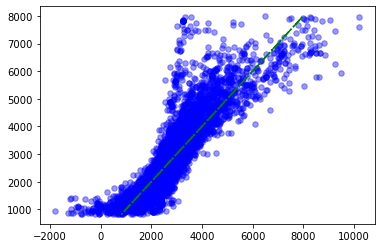

(14695,)
(14695,)


In [149]:
train_test_error_ridge(feature_cols, target)

In [ ]:
train_test_error_elastic(feature_cols, target)

<a id="section_total_price_estimate"></a> 
<h3>Estimación de precio total utilizando el mismo modelo</h3>

[volver a TOC](#section_toc)

In [ ]:
feature_cols = ['surface_covered_in_m2','surface_total_in_m2',
                'pool', 'laundry', 'parking', 'gym', 'rooms']
feature_cols.extend(feature_cols_places)
feature_cols.extend(feature_cols_prop)
feature_cols.extend(feature_cols_labels)
feature_cols.extend(feature_cols_rooms)

target = ['price_aprox_usd']


In [ ]:
train_test_error(feature_cols, target)

In [ ]:
train_test_error_elastic(feature_cols, target)

In [ ]:
train_test_error_lasso(feature_cols, target)

In [ ]:
train_test_error_ridge(feature_cols, target)